In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import cv2 as cv
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [34]:
data = []
labels = []
image_category=os.listdir("../input/cell_images/cell_images/")

def load_image_data(img_path,img_category):
    """
    load_image_data Function load the image for given directory
    img_path:img_path variable is also file path of image in directory
    img_category:img_category variable use for 0 or 1 for Parasitized or Uninfected 
    """
    try:
        img = cv.imread(img_path)
        img = cv.resize(img,(64,64))
        img = tf.keras.preprocessing.image.img_to_array(img)
        data.append(img)
        labels.append(img_category)
    except Exception as Error:
        print(Error)
        
    
def def_load_directory(image_type,img_category):
    """
    def_load_directory Function load the image for given directory
    image_type:image_type is variable use for define the image Parasitized or Uninfected
               image_type variable is also file path of image in directory
    img_category:img_category variable use for 0 or 1 for Parasitized or Uninfected 
    """
    image_directory_path = os.path.join("../input/cell_images/cell_images/",image_type)
    image_list = os.listdir(image_directory_path)
    for image in image_list:
        image_path = os.path.join(image_directory_path,image)
        load_image_data(image_path,img_category)
        
        
for image_type  in image_category:
    if image_type == "Parasitized":
        def_load_directory(image_type,0)
    if image_type == "Uninfected":
        def_load_directory(image_type,1)


OpenCV(4.1.0) /io/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.0) /io/opencv/modules/imgproc/src/resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [35]:
cells = np.array(data)
labels = np.array(labels)
cells.shape,labels.shape

((27558, 64, 64, 3), (27558,))

In [37]:
cells,labels = shuffle(cells,labels)

In [38]:
cells = cells.astype("float32")/255
labels = tf.keras.utils.to_categorical(labels)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(cells,labels,test_size=0.33,random_state=45)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18463, 64, 64, 3), (9095, 64, 64, 3), (18463, 2), (9095, 2))

In [40]:
x_train = x_train.reshape(-1,64,64,3)
x_test = x_test.reshape(-1,64,64,3)

In [41]:
conv_layer_1 = tf.keras.layers.Conv2D(32,kernel_size=2,padding="same",
                                                activation='relu',input_shape=(64,64,3))
pool_layer_1 = tf.keras.layers.MaxPool2D(pool_size=2)

conv_layer_2 = tf.keras.layers.Conv2D(64,kernel_size=2,padding="same",activation='relu')
pool_layer_2 = tf.keras.layers.MaxPool2D(pool_size=2)

conv_layer_3 = tf.keras.layers.Conv2D(128,kernel_size=2,padding="same",activation='relu')
pool_layer_3 = tf.keras.layers.MaxPool2D(pool_size=2)

flatten_layer_1 = tf.keras.layers.Flatten()

dropout_layer_1 = tf.keras.layers.Dropout(0.5)

dense_layer_1 = tf.keras.layers.Dense(2,activation="softmax")

In [42]:
model = tf.keras.Sequential([conv_layer_1,pool_layer_1,
                             conv_layer_2,pool_layer_2,
                             conv_layer_3,pool_layer_3,
                             flatten_layer_1,
                             dropout_layer_1,dense_layer_1])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       32896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
__________

In [44]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [45]:
history = model.fit(x_train,y_train,batch_size=50,epochs=10,verbose=1,validation_split=0.1)

Train on 16616 samples, validate on 1847 samples
Epoch 1/10
16616/16616 [==============================] - 3s 172us/sample - loss: 0.5280 - acc: 0.7359 - val_loss: 0.2722 - val_acc: 0.9177
Epoch 2/10
16616/16616 [==============================] - 3s 152us/sample - loss: 0.2121 - acc: 0.9298 - val_loss: 0.2006 - val_acc: 0.9372
Epoch 3/10
16616/16616 [==============================] - 3s 151us/sample - loss: 0.1623 - acc: 0.9468 - val_loss: 0.2002 - val_acc: 0.9491
Epoch 4/10
16616/16616 [==============================] - 3s 151us/sample - loss: 0.1514 - acc: 0.9512 - val_loss: 0.1630 - val_acc: 0.9448
Epoch 5/10
16616/16616 [==============================] - 3s 151us/sample - loss: 0.1428 - acc: 0.9520 - val_loss: 0.1607 - val_acc: 0.9534
Epoch 6/10
16616/16616 [==============================] - 3s 151us/sample - loss: 0.1375 - acc: 0.9534 - val_loss: 0.1798 - val_acc: 0.9518
Epoch 7/10
16616/16616 [==============================] - 3s 151us/sample - loss: 0.1354 - acc: 0.9551 - val_lo

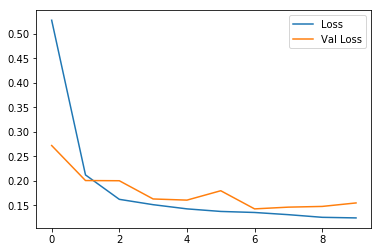

In [46]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label="Val Loss")
plt.legend()

In [47]:
accuracy  = model.evaluate(x_test,y_test)
print("Test Accuracy:-",accuracy)

9095/9095 [==============================] - 1s 98us/sample - loss: 0.1390 - acc: 0.9545
Test Accuracy:- [0.13895093246192608, 0.95448047]


In [48]:
def get_cell_name(label):
    if label==0:
        return "Paracitized"
    if label==1:
        return "Uninfected"

random_value = np.random.randint(0,len(x_test))#Select any random value form test dataset
test_case = x_test[random_value]
test_case = np.expand_dims(test_case,axis=0)#Expand one dimension for model predictation

true_test = y_test[random_value]#Select true of randomly selection image

pred_value = model.predict(np.array(test_case))#Predict the output of model

print("The Predict cell {} with accuracy:{}".format(get_cell_name(np.argmax(pred_value)),np.max(pred_value)))


The Predict cell Uninfected with accuracy:0.9675154685974121
